Импорт библиотек (requests - http-запросы, bs4 - парсинг, tabulate - красивый вывод таблички,
                  matplotlib - график, datetime - вспомогательная для графика)

In [4]:
!python -m pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

Запрос, подготовка парсера для таблицы

In [6]:
html = requests.get('https://ru.investing.com/currencies/usd-rub-historical-data')
if (html.status_code != 200):
    raise ConnectionError(f"Ошибка (статус {html.status_code})")
soap = BeautifulSoup(html.text, 'html.parser')
table = soap.find('table', class_='freeze-column-w-1 w-full overflow-x-auto text-xs leading-4')

Сбор элементов таблицы

In [7]:
data = []
for row in table.findAll('tr'):
    header_data = [elem.text.strip() for elem in row.findAll('th')]
    row_data = [elem.text.strip() for elem in row.findAll('td')]
    if header_data:
        data.append(header_data)
    if row_data:
        data.append(row_data)

Вывод таблицы с заголовками в формате "pretty"

In [8]:
print(tabulate(data, headers='firstrow', tablefmt='pretty'))

+------------+---------+---------+----------+---------+-------+--------+
|    Дата    |  Цена   |  Откр.  |  Макс.   |  Мин.   | Объём | Изм. % |
+------------+---------+---------+----------+---------+-------+--------+
| 23.10.2024 | 96,5013 | 95,7496 | 96,7549  | 95,7274 |       | +0.79% |
| 22.10.2024 | 95,7455 | 96,3100 | 97,1000  | 95,7500 |       | -1.08% |
| 21.10.2024 | 96,7955 | 96,3100 | 97,5500  | 95,7500 |       | +0.10% |
| 18.10.2024 | 96,7000 | 96,7500 | 97,2500  | 95,2500 |       | 0.00%  |
| 17.10.2024 | 96,7000 | 96,7500 | 97,7000  | 96,7500 |       | 0.00%  |
| 16.10.2024 | 96,7000 | 96,7500 | 97,7500  | 96,7500 |       | 0.00%  |
| 15.10.2024 | 96,7000 | 94,5000 | 99,1250  | 94,0000 |       | +1.16% |
| 14.10.2024 | 95,5955 | 95,6100 | 96,4500  | 95,6000 |       | -0.21% |
| 11.10.2024 | 95,7955 | 97,2100 | 97,2100  | 95,2000 |       | -0.83% |
| 10.10.2024 | 96,5955 | 97,1600 | 97,6000  | 96,6000 |       | -0.41% |
| 09.10.2024 | 96,9955 | 97,0000 | 100,3000 | 96,31

Фасовка данных для графика

In [9]:
date_values = []
cost_values = []
for row in data[1:]:
    date_values.append(datetime.strptime(row[0], '%d.%m.%Y'))
    cost_values.append(float(row[1].replace(',', '.')))

Отрисовка графика

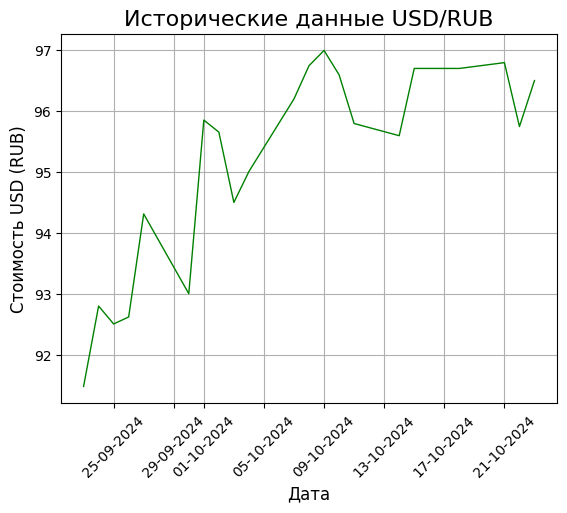

In [10]:
plt.plot(date_values, cost_values, color='green', linewidth=1, linestyle='-')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)

plt.title('Исторические данные USD/RUB', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Стоимость USD (RUB)', fontsize=12)

plt.grid(True)
plt.show()

Изначально хотел через API (https://api.investing.com/api/financialdata/historical/2186?start-date=2024-10-21&end-date=2024-10-22&time-frame=Daily&add-missing-rows=false), но меня остановил CloudFlare, не так всё просто оказалось